# Introducción y descripción del proyecto

Como analista de datos que trabaja para el operador de telecomunicaciones Megaline, me han pedido que realice un análisis inicial de los tarifas prepago en función de una muestra de clientes proporcionada por dos planes diferentes; **Surf y Ultimate**.
 
El departamento de publicidad quiere saber cuál de los dos planes prepago genera más ingresos para ajustar el presupuesto de publicidad.

## Propósito del Proyecto

Voy a realizar el análisis de tarifas preliminar basado en una selección relativamente pequeña de clientes. Me han dado datos de 500 clientes de Megaline: ¿quiénes son los clientes?, ¡de dónde son?, ¿qué tarifa usan y la cantidad de llamadas que hicieron y mensajes de texto que enviaron en 2018?. Mi trabajo es analizar el comportamiento de los clientes y determinar qué tarifa prepago genera más ingresos.
 
El análisis se dividirá en cuatro pasos principales:
* Paso 1. Abra el archivo de datos y estudie la información general
* Paso 2. Preprocesamiento de datos
* Paso 3. Analiza los datos
* Paso 4. Prueba las hipótesis

## Descripción del planes prepago

### Descripción del plan prepago
#### Surf
 
1. Costo mensual: USD 20
2. 500 minutos de duración de llamadas al mes, 50 SMS y 15 GB de datos
3. Una vez superado el límite del plan, se aplicarán cargos:
    * 1 minuto: 3 centavos
    * 1 SMS: 3 centavos
    * 1 GB de datos: USD 10

#### Ultimate

1. Costo mensual: USD 70
2. 3000 minutos de duración de llamadas al mes, 1000 SMS y 30 GB de datos
3. Una vez superado el límite del plan, se aplicarán cargos:
    * 1 minuto: 1 centavo
    * 1 SMS: 1 centavo
    * 1 GB de datos: USD 7

#### Nota
* Megalines redondean los segundos a minutos y los megabytes a gigabytes.
* Para las llamadas, cada llamada individual se redondea: incluso si la llamada dura solo un segundo, contará como un minuto.
* Para el tráfico web, cada sesión web no se redondea. Sin embargo, el total de un mes se redondea hacia arriba. Si un usuario gasta 1025 megabytes este mes, se le cobrarán 2 gigabytes.

# Paso 1. Carga de Datos

## Cargar librerías

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats
import matplotlib as plt
from matplotlib import pyplot as st
import seaborn as sns

## Cargar los datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_calls = pd.read_csv(r'C:/Users/bokol/OneDrive/Desktop/Tripleten/Sprint 4/megaline_calls.csv')
df_internet = pd.read_csv(r'C:/Users/bokol/OneDrive/Desktop/Tripleten/Sprint 4/megaline_internet.csv')
df_messages = pd.read_csv(r'C:/Users/bokol/OneDrive/Desktop/Tripleten/Sprint 4/megaline_messages.csv')
df_plans = pd.read_csv(r'C:/Users/bokol/OneDrive/Desktop/Tripleten/Sprint 4/megaline_plans.csv')
df_users = pd.read_csv(r'C:/Users/bokol/OneDrive/Desktop/Tripleten/Sprint 4/megaline_users.csv')

# Paso 2. Preprocesamiento de datos

## Estudia la información general



En la fase de exploración inicial del análisis, llamaré a cuatro funciones diferentes para examinar posibles problemas dentro de los datos. Las funciones a llamar son: **.shape / .info() / .describe() y .head()**


### DataFrame df_calls
***

In [3]:
df_calls.shape

(137735, 4)

In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [6]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


#### Observaciones

***Descripción DataFrame***
El DataFrame consta de ***137.735*** filas y ***4*** columnas.

***Descripción de la columna***
 
* id — Identificación única de llamadas
* call_date — fecha de la llamada
* duration — la duración de la llamada (en minutos)
* user_id — ID del usuario que realizó la llamada
 
***Problemas y tratamiento***
* No falta ningún valor en este DataFrame
* call_date Dtype es actualmente **object** pero debe convertirse en DateTime
* El valor de la duración debe redondearse al entero más cercano
* El recuento de llamadas y la duración deben agregarse por su ID de usuario y mes.

### DataFrame df_internet
***

In [7]:
df_internet.shape

(104825, 4)

In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [10]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


#### Observaciones

***Descripción DataFrame***<br>
El DataFrame consta de ***104 825*** filas y ***4*** columnas.
 
***Descripción de la columna***
 
* id — ID de sesión web única
* mb_used: volumen de datos gastados durante una sesión (en megabytes)
* session_date — fecha de la sesión web
* user_id — ID de usuario
 
***Problemas y tratamiento***
* No falta ningún valor en esta tabla
* session_date Dtype es actualmente ***object*** y debe convertirse en datetime
* El recuento de sesiones y los datos utilizados deben agregarse por su ID de usuario y mes.
* El valor agregado de mb_used debe convertirse a un valor de gigabytes y redondearse al entero más cercano


### DataFrame df_messages
***

In [11]:
df_messages.shape

(76051, 3)

In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [14]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


#### Observaciones

***Descripción DataFrame***<br>
El DataFrame consta de ***76.051*** filas y ***3*** columnas.

***Descripción de la columna***
 
* id — ID de sms único
* message_date — la fecha en que se envió el SMS
* user_id — ID del usuario que envió el SMS

***Problemas y tratamiento***
* No falta ningún valor en esta tabla
* message_date Dtype es actualmente ***object*** y debe convertirse en datetime
* El recuento de mensajes debe agregarse por su ID de usuario y mes.

### DataFrame df_plans
***


In [15]:
df_plans.shape

(2, 8)

In [16]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [17]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [18]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


#### Observaciones

***Descripción DataFrame***
El DataFrame consta de ***2*** filas y ***8*** columnas.

***Descripción de la columna***
 
* plan_name — nombre del plan telefónico
* usd_monthly_fee — tarifa mensual en dólares estadounidenses
* minutes_inclusive — pago mensual de minutos de llamadas
* mensajes_incluidos: previsto mensual de SMS
* mb_per_month_included — previsto de volumen de datos mensuales (en megabytes)
* usd_per_minute: el precio por minuto si ha superado el límite de pedir de paquetes (por ejemplo, si el plan tiene una pedir de 100 minutos, se cobrará el uso a partir del minuto 101)
* usd_per_message — precio por SMS si ha excedido el límite de cotización de paquetes
* usd_per_gb: precio por gigabyte adicional de datos si ha excedido el límite de presupuesto de paquetes (1 GB = 1024 megabytes)
 
***Problemas y tratamiento***
* No hay valores faltantes en la tabla.
* Dtypes parece ajustarse a los datos en el DataFrame
* No veo ningún problema en general en este DataFrame

### DataFrame df_users
***

In [19]:
df_users.shape

(500, 8)

In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [22]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


#### Observaciones

***Descripción DataFrame***<br>
El DataFrame consta de ***500*** filas y ***8*** columnas.
 
***Descripción de la columna***
 
* user_id — ID de usuario
* first_name — el nombre del usuario
* last_name — el apellido del usuario
* age— la edad del usuario (años)
* reg_date — fecha de inicio de la suscripción (dd, mm, aa)
* churn_date: la fecha en que el usuario dejó de usar el servicio (si falta o falta el valor, significa que el plan de servicio está en uso cuando se crean estos datos)
* city — la ciudad donde vive el usuario
* plan: nombre del plan de telefono

***Problemas y tratamiento***
* En la columna ***churn_date*** tenemos algunos valores faltantes. Los valores que faltan significan que el plan de servicio está en uso, así que intentaré ver si podemos reemplazar los valores por algo más.
* Dtypes parece ajustarse a los datos en el DataFrame
* No veo ningún problema en general en este DataFrame

### Conclucion y Próximos Pasos
 
Para realizar mi análisis, tengo 5 DataFrames diferentes disponibles. En la mayoría de los DataFrames hay datos que deben corregirse antes de pasar al análisis de los datos.
 
* **df_calls** consta de **137.735 filas y 4 columnas**.
     * En df_calls necesito corregir el **Dtype** en la columna **call_date**. Necesito redondear la duración de las llamadas al número entero más cercano y, por último, necesito agregar el número de llamadas y la duración por su ID de usuario y mes.

* **df_internet** consta de **104.825 filas y 4 columnas**.
     * En df_internet necesito corregir el **Dtype** en la columna **session_date**. Necesito agregar el recuento de sesiones y los datos utilizados con su ID de usuario y mes. Por último, necesito que **md_used** se convierta a gigabyte y se redondee al número entero más cercano.

* **df_messages** consta de **76.051 filas y 3 columnas**.
     * En df_internet necesito corregir el **Dtype** en la columna **message_date** necesito agregar el número de mensajes con su user_id y mes
 
* **df_plans** consta de **2 filas y 8 columnas.**
     * Este DataFrame no presenta ningún problema por ahora y se dejará como está por ahora.

* **df_users** consta de **500 filas y 8 columnas.**
      * En la columna **churn_date** tenemos valores de NaN. Necesito investigar qué cubren estos valores de NaN y, si es necesario, los reemplazaré por valores más adecuados.
     
En **los siguientes pasos**, revisaré cada uno de los DataFrames para solucionar los problemas encontrados anteriormente.


## Corrigir y Enriquecer los DataFrames

### DataFrame df_calls
***

In [23]:
# Convierta los tipos de datos call_date en datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format ='%Y-%m-%d')

In [24]:
# Crea una nueva columna que muestra el mes en que se realizó la llamada
df_calls['month'] = df_calls['call_date'].dt.month


In [25]:
# Redondea la duración y conviértela en entero
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

In [26]:
# Recuento total de llamadas y duración total por su ID de usuario y mes
df_calls = (df_calls.groupby(['user_id','month'])
         .agg({'id':'count','duration':'sum'})
         .rename(columns={'id':'calls'}))

In [27]:
print(df_calls.info())
print(df_calls.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2258 entries, (1000, 12) to (1499, 12)
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   calls     2258 non-null   int64
 1   duration  2258 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 37.0 KB
None
             calls     duration
count  2258.000000  2258.000000
mean     60.998671   435.937555
std      31.770869   231.972343
min       1.000000     0.000000
25%      39.000000   275.000000
50%      60.000000   429.000000
75%      80.000000   574.750000
max     205.000000  1510.000000


In [28]:
df_calls.head()

calls  duration
user_id month                 
1000    12        16       124
1001    8         27       182
        9         49       315
        10        65       393
        11        64       426

### DataFrame df_internet
***

In [29]:
# Convierta los tipos de datos session_date en datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format ='%Y-%m-%d')

In [30]:
# Crea una nueva columna que muestra el mes en que se realizó la sesión de Internet
df_internet['month'] = df_internet['session_date'].dt.month

In [31]:
# Recuento total de sesiones y megabytes utilizados por su ID de usuario y mes
df_internet = (df_internet.groupby(['user_id','month'])
         .agg({'id':'count','mb_used':'sum'})
         .rename(columns={'id':'session','mb_used':'mb_used'}))

In [32]:
# Convertir megabyte usado a gigabyte usado, redondear hacia arriba y convertir a entero
df_internet['data'] = np.ceil(df_internet['mb_used']/1024).astype(int)

In [33]:
print(df_internet.info())
print(df_internet.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2277 entries, (1000, 12) to (1499, 12)
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   session  2277 non-null   int64  
 1   mb_used  2277 non-null   float64
 2   data     2277 non-null   int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 55.1 KB
None
           session       mb_used         data
count  2277.000000   2277.000000  2277.000000
mean     46.036451  16882.197501    16.989021
std      19.275885   7869.784848     7.693683
min       1.000000     92.310000     1.000000
25%      35.000000  12347.720000    13.000000
50%      48.000000  16873.740000    17.000000
75%      58.000000  21041.520000    21.000000
max     138.000000  70931.590000    70.000000


In [34]:
df_internet.head()

session   mb_used  data
user_id month                         
1000    12           5   1901.47     2
1001    8           25   6919.15     7
        9           53  13314.82    14
        10          56  22330.49    22
        11          51  18504.30    19

### DataFrame df_messages
***


In [35]:
# Convierta los tipos de datos message_date en datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format ='%Y-%m-%d')

In [36]:
# Crea una nueva columna que muestra el mes en que se envió el mensaje
df_messages['month'] = df_messages['message_date'].dt.month

In [37]:
# Conteo de mensajes agregados por su ID de usuario y mes
df_messages = (df_messages.groupby(['user_id','month'])
         .agg({'id':'count'})
         .rename(columns={'id':'messages'}))     

In [38]:
df_messages.head()

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36

In [39]:
print(df_messages.info())
print(df_messages.describe())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1806 entries, (1000, 12) to (1497, 12)
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   messages  1806 non-null   int64
dtypes: int64(1)
memory usage: 22.7 KB
None
          messages
count  1806.000000
mean     42.110188
std      33.122931
min       1.000000
25%      17.000000
50%      34.000000
75%      59.000000
max     266.000000


### DataFrame df_users
***

In [40]:
# Cree una nueva columna para mostrar el estado de los usuarios extraído de la columna de la ciudad
df_users['state'] = df_users['city'].str[-6:].str[:2]

In [41]:
# Eliminar columna innecesaria
df_users = df_users.drop(['first_name', 'last_name','age','city','reg_date','churn_date'], axis = 1)

In [42]:
# Establecer user_id como índice
df_users = df_users.set_index('user_id')

In [43]:
df_users.head()

,plan,state
user_id,,
1000,ultimate,GA
1001,surf,WA
1002,surf,NV
1003,surf,OK
1004,surf,WA


## Merge Tablas

Los DataFrames ahora se han transformado de manera más uniforme y están listos para unirse para formar un nuevo DataFrame para un análisis posterior.

In [44]:
# Cree un nuevo marco de datos que fusionó todas las tablas

temp_1 = pd.merge(df_users,df_calls,how='outer',left_index=True,right_index=True)
temp_2 = pd.merge(temp_1,df_messages,how='outer',left_index=True,right_index=True)
df = pd.merge(temp_2,df_internet,how='outer',left_index=True,right_index=True)

df.head()

plan state  calls  duration  messages  session   mb_used  \
user_id month                                                                 
1000    12     ultimate    GA   16.0     124.0      11.0      5.0   1901.47   
1001    8          surf    WA   27.0     182.0      30.0     25.0   6919.15   
        9          surf    WA   49.0     315.0      44.0     53.0  13314.82   
        10         surf    WA   65.0     393.0      53.0     56.0  22330.49   
        11         surf    WA   64.0     426.0      36.0     51.0  18504.30   

               data  
user_id month        
1000    12      2.0  
1001    8       7.0  
        9      14.0  
        10     22.0  
        11     19.0

### Columna Temporal
Siguiente tabla de fusión. Para facilitar el cálculo de los ingresos mensuales de Megaline de cada usuario, se creará una columna temporal que contiene datos sobre la duración del exceso de llamadas, la cantidad de SMS y el volumen de datos.

In [45]:
def temporary_column(source_col, limit1, limit2, dataframe=df, plan_col='plan',  plan1='surf', plan2='ultimate'):
    # Crear una lista de condiciones
    conditions = [
        (dataframe[plan_col] == plan1) & (dataframe[source_col] > limit1),
        (dataframe[plan_col] == plan1) & (dataframe[source_col] <= limit1),
        (dataframe[plan_col] == plan2) & (dataframe[source_col] > limit2),
        (dataframe[plan_col] == plan2) & (dataframe[source_col] <= limit2),
    ]
    # crear una lista de los valores que queremos asignar para cada condición
    values = [dataframe[source_col]-limit1, 0, dataframe[source_col]-limit2, 0]
    
    # Crear columna temporal
    temp_column = 'exceeded_' + source_col
    dataframe[temp_column] = np.select(conditions,values)
    
    return dataframe

In [46]:
# Duración de llamadas excedida
temporary_column('duration', 500, 3000)
# Mensajes excedidos
temporary_column('messages', 50, 1000)
# Gigabyte utilizado excedido
temporary_column('data', 15, 30)

df.head(10)


plan state  calls  duration  messages  session   mb_used  \
user_id month                                                                 
1000    12     ultimate    GA   16.0     124.0      11.0      5.0   1901.47   
1001    8          surf    WA   27.0     182.0      30.0     25.0   6919.15   
        9          surf    WA   49.0     315.0      44.0     53.0  13314.82   
        10         surf    WA   65.0     393.0      53.0     56.0  22330.49   
        11         surf    WA   64.0     426.0      36.0     51.0  18504.30   
        12         surf    WA   56.0     412.0      44.0     60.0  19369.18   
1002    10         surf    NV   11.0      59.0      15.0     21.0   6552.01   
        11         surf    NV   55.0     386.0      32.0     52.0  19345.08   
        12         surf    NV   47.0     384.0      41.0     51.0  14396.24   
1003    12         surf    OK  149.0    1104.0      50.0     52.0  27044.14   

               data  exceeded_duration  exceeded_messages  exceeded_data  
user_id month                                                             
1000    12      2.0                0.0                0.0            0.0  
1001    8       7.0                0.0                0.0            0.0  
        9      14.0                0.0                0.0            0.0  
        10     22.0                0.0                3.0            7.0  
        11     19.0                0.0                0.0            4.0  
        12     19.0                0.0                0.0            4.0  
1002    10      7.0                0.0                0.0            0.0  
        11     19.0                0.0                0.0            4.0  
        12     15.0                0.0                0.0            0.0  
1003    12     27.0              604.0                0.0           12.0

**monthly_income**
 
El valor de los ingresos_mensuales se calculó con base en el plan prepago proporcionado en la etapa inicial de este proyecto.
 
* Para el plan Surf, una vez superado el límite del plan, se aplicarán los siguientes cargos:
    * 1 minuto: 3 centavos
    * 1 SMS: 3 centavos
    * 1 GB de datos: USD 10
    
* Para el plan Ultimate, una vez superado el límite del plan, se aplicarán los siguientes cargos:
    * 1 minuto: 1 centavo
* 1 SMS: 1 centavo
* 1 GB de datos: USD 7

Ingreso mensual

In [47]:
# crear una lista de nuestras condiciones
conditions = [
    df['plan'] == 'surf',   
    df['plan'] == 'ultimate',
    ]

In [48]:
# crear una lista de los valores que queremos asignar para cada condición
values = [
    (20 + df['exceeded_duration']*0.03 + df['exceeded_messages']*0.03 + df['exceeded_data']*10),
    (70 + df['exceeded_duration']*0.01 + df['exceeded_messages']*0.01 + df['exceeded_data']*7)
]

In [49]:
# cree una nueva columna y use np.select para asignarle valores usando nuestras listas como argumentos
df['monthly_income'] = np.select(conditions, values)

### Dataframe Final

In [50]:
# Eliminar columna temporal
df = df.drop(['exceeded_duration','exceeded_messages','exceeded_data'],axis=1)

df.head()

plan state  calls  duration  messages  session   mb_used  \
user_id month                                                                 
1000    12     ultimate    GA   16.0     124.0      11.0      5.0   1901.47   
1001    8          surf    WA   27.0     182.0      30.0     25.0   6919.15   
        9          surf    WA   49.0     315.0      44.0     53.0  13314.82   
        10         surf    WA   65.0     393.0      53.0     56.0  22330.49   
        11         surf    WA   64.0     426.0      36.0     51.0  18504.30   

               data  monthly_income  
user_id month                        
1000    12      2.0           70.00  
1001    8       7.0           20.00  
        9      14.0           20.00  
        10     22.0           90.09  
        11     19.0           60.00

In [51]:
df.describe()

,calls,duration,messages,session,mb_used,data,monthly_income
count,2258.000000,2258.000000,1806.000000,2277.000000,2277.000000,2277.000000,2293.000000
mean,60.998671,435.937555,42.110188,46.036451,16882.197501,16.989021,62.986446
std,31.770869,231.972343,33.122931,19.275885,7869.784848,7.693683,45.426181
min,1.000000,0.000000,1.000000,1.000000,92.310000,1.000000,0.000000
25%,39.000000,275.000000,17.000000,35.000000,12347.720000,13.000000,22.580000
50%,60.000000,429.000000,34.000000,48.000000,16873.740000,17.000000,70.000000
75%,80.000000,574.750000,59.000000,58.000000,21041.520000,21.000000,70.000000
max,205.000000,1510.000000,266.000000,138.000000,70931.590000,70.000000,590.370000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (1000, 12) to (1499, 12)
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   plan            2258 non-null   object 
 1   state           2258 non-null   object 
 2   calls           2258 non-null   float64
 3   duration        2258 non-null   float64
 4   messages        1806 non-null   float64
 5   session         2277 non-null   float64
 6   mb_used         2277 non-null   float64
 7   data            2277 non-null   float64
 8   monthly_income  2293 non-null   float64
dtypes: float64(7), object(2)
memory usage: 188.2+ KB


In [53]:
df.shape

(2293, 9)

**Descripción de la columna**
* user_id — ID de usuario
* month — mes de suscripción
* plan — nombre del plan de teléfono
* state — el estado donde vive el usuario
* calls — número de llamadas realizadas por el usuario
* duration — duración total de las llamadas realizadas por el usuario
* messages — número de mensajes enviados por el usuario
* session — número de sesión web realizada por el usuario
* data: gigabyte total utilizado por el usuario
* month_income — facturas totales recibidas por el usuario cada mes

# Paso 3. Analiza los datos

* Describe el comportamiento de los clientes. 
* Encuentra los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes. 
* Calcula la media, la varianza y la desviación estándar. 
* Traza histogramas. 
* Describe las distribuciones.

## Comportamiento del consumidor sobre la duración de la llamada

In [54]:
surf_calls = df[df['plan']=='surf']['duration']
ultimate_calls = df[df['plan']=='ultimate']['duration']

print('La duración media de las llamadas realizadas por el suscriptor de Surf son', np.mean(surf_calls).round(2), 'minutos')
print('con una varianza de', np.var(surf_calls).round(2))
print('y desviación estándar de', np.std(surf_calls).round(2), 'minutos')
print()
print('Mientras que para el suscriptor Ultimate, el promedio es', np.mean(ultimate_calls).round(2), 'minutos')
print('con una varianza de', np.var(ultimate_calls).round(2))
print('y desviación estándar de', np.std(ultimate_calls).round(2), 'minutos')

La duración media de las llamadas realizadas por el suscriptor de Surf son 436.52 minutos
con una varianza de 52537.04
y desviación estándar de 229.21 minutos

Mientras que para el suscriptor Ultimate, el promedio es 434.68 minutos
con una varianza de 56494.29
y desviación estándar de 237.69 minutos


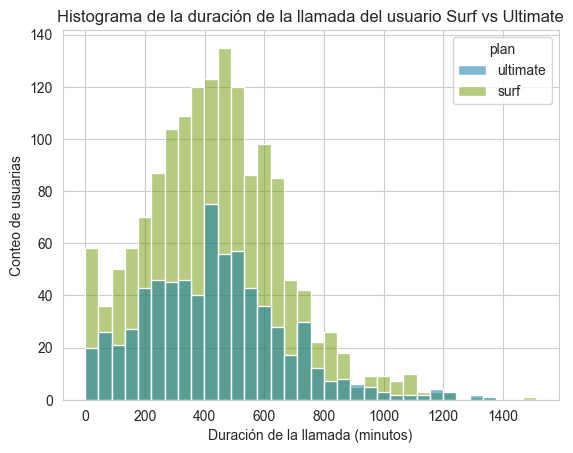

In [55]:
sns.set_style("whitegrid")
sns.set_palette(['#0072A8', '#6C9900'])

a= sns.histplot(data=df, x="duration", hue="plan")
_ = a.set_title('Histograma de la duración de la llamada del usuario Surf vs Ultimate')
_ = a.set(xlabel='Duración de la llamada (minutos)', ylabel='Conteo de usuarias')

Tanto Ultimate como Surf alcanzaron un máximo de unos 500 minutos, con una distribución sesgada hacia la izquierda. El límite de duración de la llamada es superado por un gran número de usuarios de Surf, pero no por ninguno de los usuarios de Ultimate.

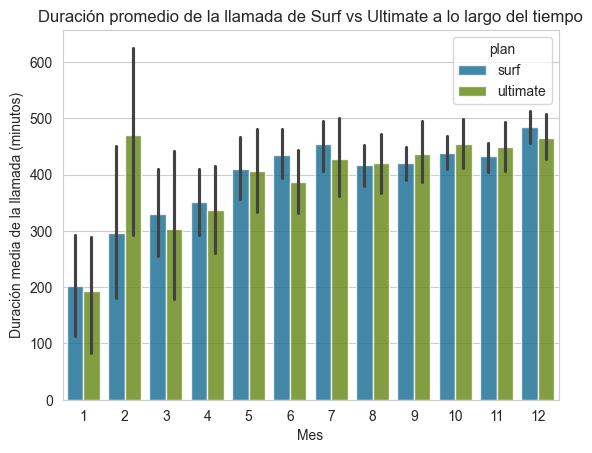

In [56]:
b= sns.barplot(data=df, x=df.index.get_level_values(1), y="duration", hue="plan", alpha=0.8)
_ = b.set_title('Duración promedio de la llamada de Surf vs Ultimate a lo largo del tiempo')
_ = b.set(xlabel='Mes',ylabel='Duración media de la llamada (minutos)')

## Comportamiento del consumidor en los mensajes enviados

In [67]:
surf_messages = df[df['plan']=='surf']['messages']
ultimate_messages = df[df['plan']=='ultimate']['messages']

print('La cantidad promedio de mensajes enviados por el suscriptor de Surf son', np.mean(surf_messages).round(2))
print('con una varianza de', np.var(surf_messages).round(2))
print('y desviación estándar de', np.std(surf_messages).round(2))
print()
print('Mientras que para el suscriptor Ultimate, el promedio es', np.mean(ultimate_messages).round(2))
print('con una varianza de', np.var(ultimate_messages).round(2))
print('y desviación estándar de', np.std(ultimate_messages).round(2))

La cantidad promedio de mensajes enviados por el suscriptor de Surf son 39.98
con una varianza de 1100.62
y desviación estándar de 33.18

Mientras que para el suscriptor Ultimate, el promedio es 46.46
con una varianza de 1082.52
y desviación estándar de 32.9


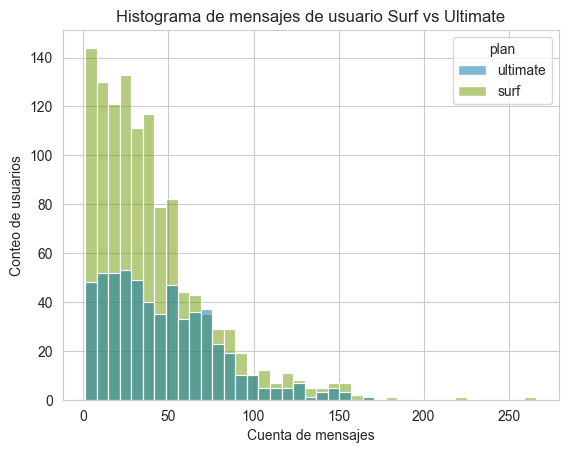

In [68]:
c= sns.histplot(data=df, x="messages", hue="plan")
_ = c.set_title('Histograma de mensajes de usuario Surf vs Ultimate')
_ = c.set(xlabel='Cuenta de mensajes', ylabel='Conteo de usuarios')

Como se señaló anteriormente, algunos usuarios de Surf han excedido el límite de mensajes, pero ningún usuario de Ultimate lo ha hecho. La distribución estaba sesgada hacia la derecha, con un pico cercano a cero, lo que indica que los usuarios de Surf y Ultimate no utilizaban mensajes con frecuencia. Esto parece lógico dado que, en nuestra era actual, más personas usan aplicaciones de mensajería como WhatsApp para interactuar con otros que la mensajería tradicional.

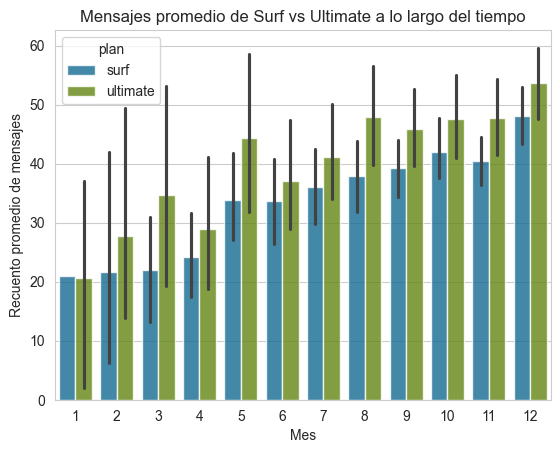

In [69]:
d= sns.barplot(data=df, x=df.index.get_level_values(1), y="messages", hue="plan", alpha=0.8)
_ = d.set_title('Mensajes promedio de Surf vs Ultimate a lo largo del tiempo')
_ = d.set(xlabel='Mes',ylabel='Recuento promedio de mensajes')


## Comportamiento del consumidor en el uso de internet

In [70]:
surf_data = df[df['plan']=='surf']['data']
ultimate_data = df[df['plan']=='ultimate']['data']

print('La cantidad promedio de datos utilizados por el suscriptor de Surf son', np.mean(surf_data).round(2), 'gigabytes')
print('con una varianza de', np.var(surf_data).round(2))
print('y desviación estándar de', np.std(surf_data).round(2), 'gigabytes')
print()
print('Mientras que para el suscriptor Ultimate, el promedio es', np.mean(ultimate_data).round(2), 'gigabytes')
print('con una varianza de', np.var(ultimate_data).round(2))
print('y desviación estándar de', np.std(ultimate_data).round(2), 'gigabytes')

La cantidad promedio de datos utilizados por el suscriptor de Surf son 16.78 gigabytes
con una varianza de 56.91
y desviación estándar de 7.54 gigabytes

Mientras que para el suscriptor Ultimate, el promedio es 17.37 gigabytes
con una varianza de 57.38
y desviación estándar de 7.57 gigabytes


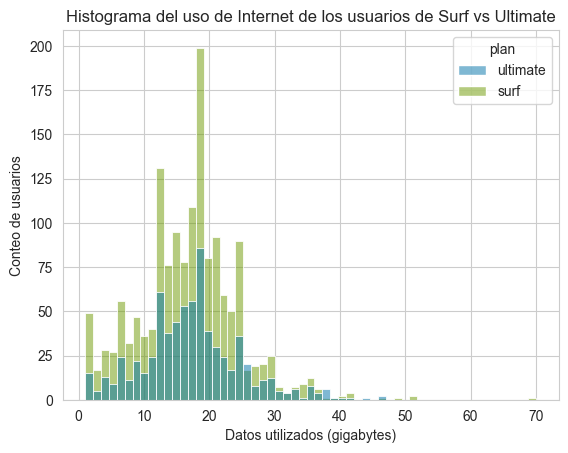

In [71]:
e= sns.histplot(data=df, x="data", hue="plan")
_ = e.set_title('Histograma del uso de Internet de los usuarios de Surf vs Ultimate')
_ = e.set(xlabel='Datos utilizados (gigabytes)', ylabel='Conteo de usuarios')


Tanto Ultimate como Surf alcanzaron un máximo de entre 17 y 20 gigabytes.


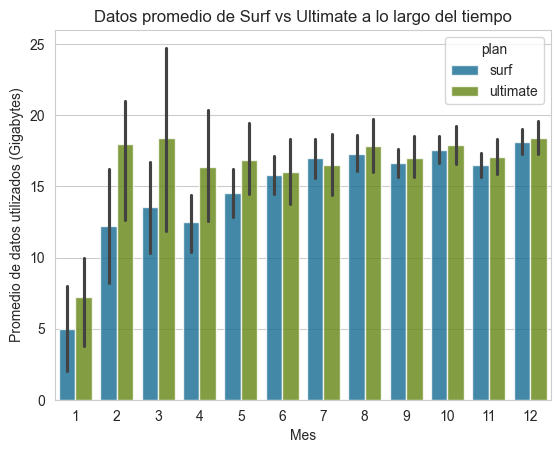

In [72]:
f= sns.barplot(data=df, x=df.index.get_level_values(1), y="data", hue="plan", alpha=0.8)
_ = f.set_title('Datos promedio de Surf vs Ultimate a lo largo del tiempo')
_ = f.set(xlabel='Mes',ylabel='Promedio de datos utilizados (Gigabytes)')

## Ingreso mensual

In [73]:
surf_income = df[df['plan']=='surf']['monthly_income']
ultimate_income = df[df['plan']=='ultimate']['monthly_income']

print('el número promedio de facturas que debe pagar el suscriptor de Surf son', np.mean(surf_income).round(2), 'USD')
print('con una varianza de', np.var(surf_income).round(2))
print('y desviación estándar de', np.std(surf_income).round(2), 'USD')
print()
print('Mientras que para el suscriptor Ultimate, el promedio es', np.mean(ultimate_income).round(2), 'USD')
print('con una varianza de', np.var(ultimate_income).round(2))
print('y desviación estándar de', np.std(ultimate_income).round(2), 'USD')

el número promedio de facturas que debe pagar el suscriptor de Surf son 60.13 USD
con una varianza de 2863.96
y desviación estándar de 53.52 USD

Mientras que para el suscriptor Ultimate, el promedio es 72.28 USD
con una varianza de 128.69
y desviación estándar de 11.34 USD


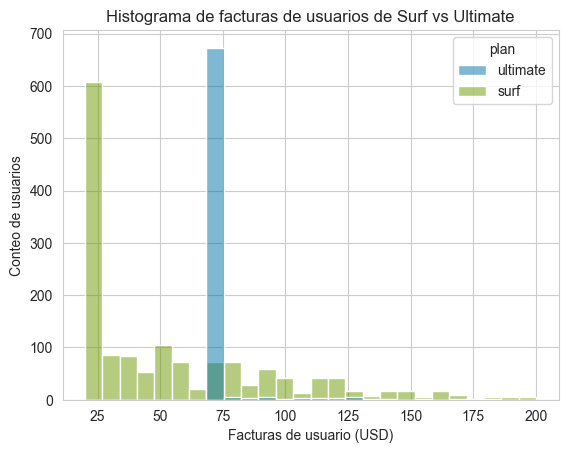

In [74]:
g= sns.histplot(data=df, x="monthly_income", hue="plan",binrange=(20,200))
_ = g.set_title("Histograma de facturas de usuarios de Surf vs Ultimate")
_ = g.set(xlabel='Facturas de usuario (USD)', ylabel='Conteo de usuarios')

Los ingresos de cada plan alcanzaron su punto máximo en la tarifa mensual original, y muchos usuarios de Surf pagaron más debido a su propensión a exceder el límite mensual.

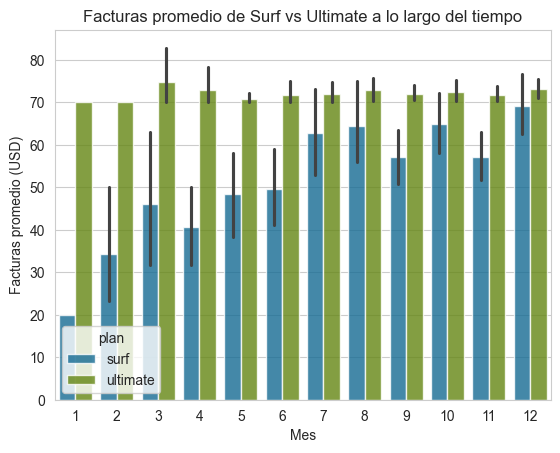

In [75]:
h= sns.barplot(data=df, x=df.index.get_level_values(1), y="monthly_income", hue="plan", alpha=0.8)
_ = h.set_title('Facturas promedio de Surf vs Ultimate a lo largo del tiempo')
_ = h.set(xlabel='Mes',ylabel='Facturas promedio (USD)')

La factura promedio de cada paquete al comienzo del año es igual a la tarifa mensual original. A medida que avanza el año, el costo promedio del usuario de Surf aumenta para igualar el de los usuarios de Ultimate al final del año.

# Paso 4. Prueba las hipótesis

Principalmente para el análisis me dieron dos hipótesis diferentes para ser respondidas:
 
* El ingreso promedio de los usuarios de los planes de teléfono Ultimate y Surf es diferente.
* Los ingresos promedio de los usuarios en la región NY-NJ son diferentes de los ingresos de los usuarios de otras regiones.

En la siguiente sección voy a responder a estos dos

## Hipótesis 1

El ingreso promedio de los usuarios de los planes de teléfono Ultimate y Surf es diferente.

* H0 (hipótesis nula): el ingreso promedio de los usuarios de los planes de teléfono Ultimate y Surf es igual
* H1 (hipótesis alternativa): el ingreso promedio de los usuarios de los planes de teléfono Ultimate y Surf no es igual

Según la sección anterior, la variación de los ingresos mensuales entre Surf y Ultimate es diferente, por lo tanto, el parámetro `equal_var` en el siguiente código se establece en False.
 
El umbral (alfa) se establece en 5\% (2,5\% en cada lado) ya que es una de las medidas comunes de significancia estadística.

In [77]:
alpha = 0.05
results_1 = stats.ttest_ind(surf_income, ultimate_income, equal_var=False)

In [78]:
# imprimir el valor p
print('valor p:',results_1.pvalue) 

valor p: 3.3636448688101445e-17


In [79]:
# comparar el valor p con el nivel de significancia
if results_1.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula


### Conclusión Hipótesis 1
En esta prueba se rechaza la hipótesis nula, lo que implica que el ingreso promedio de los usuarios de los planes de telefonía Ultimate y Surf no es igual.

## Hipótesis 2
Los ingresos promedio de los usuarios en la región NY-NJ son diferentes de los ingresos de los usuarios de otras regiones.
 
* H0 (hipótesis nula): los ingresos promedio de los usuarios en la región NY-NJ son iguales a los ingresos de los usuarios de otras regiones
* H1 (hipótesis alternativa): los ingresos promedio de los usuarios en la región NY-NJ no son iguales a los ingresos de los usuarios de otras regiones
 
El umbral (alfa) se establece en 5\% (2,5\% en cada lado) ya que es una de las medidas comunes de significancia estadística.


In [80]:
NY_NJ_income = df[(df['state']=='NY') | (df['state']=='NJ')]['monthly_income']
Other_state_income = df[(df['state']!='NY') & (df['state']!='NJ')]['monthly_income']

print('Variación de ingresos de los usuarios de Nueva York y Nueva Jersey:', np.var(NY_NJ_income).round(2))
print('Variación de ingresos de otros usuarios estatales:', np.var(Other_state_income).round(2))

Variación de ingresos de los usuarios de Nueva York y Nueva Jersey: 3135.21
Variación de ingresos de otros usuarios estatales: 2047.41


La variación de los ingresos mensuales entre los usuarios de Nueva York y Nueva Jersey y los usuarios de otros estados es diferente, por lo tanto, el parámetro `equal_var` en el siguiente código se establece en False.


In [81]:
alpha = 0.05
results_2 = stats.ttest_ind(NY_NJ_income, Other_state_income, equal_var=False)

In [82]:
# imprimir el valor p
print('valor p:',results_2.pvalue.round(2)) 

valor p: 0.32


In [83]:
# comparar el valor p con el nivel de significancia
if results_2.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

No podemos rechazar la hipótesis nula


### Conclusión hipótesis 2
La hipótesis nula no se puede rechazar en esta prueba, lo que implica que los ingresos promedio de los usuarios en la región NY-NJ son iguales a los ingresos de los usuarios de otras regiones.

Conclusión general
 
***
**Descripción general**
***

Para realizar el análisis y probar las dos hipótesis sobre Megalines dos planes prepago, originalmente me dieron 5 DataFrames diferentes:
 
* **df_calls** constaba de **137.735 filas y 4 columnas**.
* **df_internet** constaba de **104.825 filas y 4 columnas**.
* **df_messages** constaba de **76.051 filas y 3 columnas**.
* **df_plans** constaba de **2 filas y 8 columnas.**
* **df_users** constaba de **500 filas y 8 columnas.**
 
Lo primero que tuve que hacer fue limpiar y alinear los DataFrames para poder comenzar el trabajo de combinarlos en **un DataFrame** que me permitiera realizar mi análisis y responder a las hipótesis planteadas por Megaline.
 
***
**¿Cuáles fueron los mayores problemas con los DataFrames?**
***
 
Los DataFrames como tales estaban bastante limpios. No presentaron ningún problema en términos de **valores NaN**, **valores atípicos**, **nombres de columnas impares** o **duplicados**
 
Sin embargo, un error en varios de los DataFrames fue **Dtypes incorrectos** en las columnas de fecha y tuve que corregirlos. Este sería un problema que podría notificar al departamento de marketing para asegurar que estén más atentos en el futuro.
 
Otros factores para corregir involucraron principalmente la limpieza de los DataFrames para prepararlos y hacerlos más adecuados para la fusión, incluido **redondear valores al número entero más cercano** y **agregar y agrupar differente datos**.
 
***
**El siguiente paso fue analizar los datos**
***
 
El objetivo principal en esta parte del análisis fue analizar y describir el comportamiento de los clientes.
Aquí describí el comportamiento del consumo de llamadas, mensajes y uso de internet y además se describieron los ingresos mensuales. Por último, realicé un breve análisis de correlación, para encontrar factores de correlación para el uso de los planes prepago.
 
 ***
**Conclusión general**
***
 
El objetivo de este proyecto es analizar el comportamiento del cliente y determinar **qué plan prepago genera más ingresos**. Los resultados del análisis son:
 
La mayoría de los usuarios de Surf **tienden a superar su límite de uso mensual.**
No obstante, **el ingreso promedio generado por los usuarios de Ultimate es más alto y más consistente cada mes.**
 
Este proyecto también prueba dos hipótesis que dieron como resultado las siguientes afirmaciones:
 
El ingreso promedio de los usuarios de los planes de telefonía Ultimate y Surf **no es igual**
los ingresos promedio de los usuarios en la región NY-NJ **es igual a los ingresos de los usuarios de otras regiones**